In [50]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline
warnings.filterwarnings("ignore")

# 1. Feedforward

### 1.1 Plot of neural networks

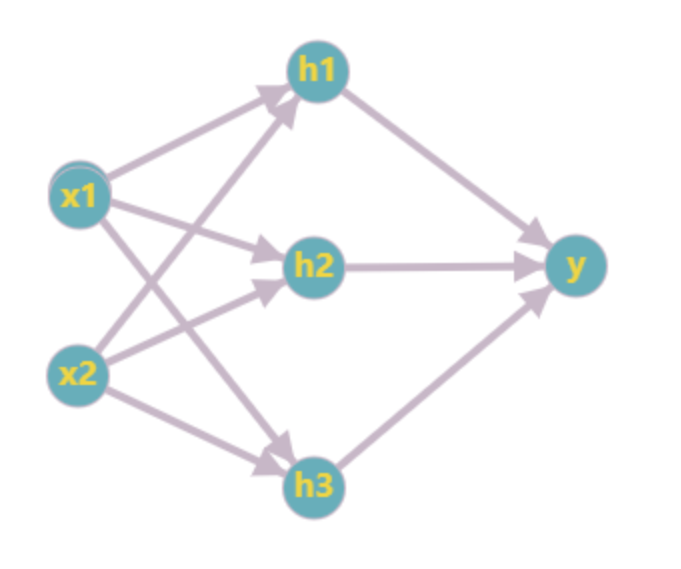

In [51]:
Image(filename='network.png') 

### 1.2 Mathematical equation 

$$\hat{y} = sigmoid(relu(\vec{x}\vec{w_1} + \vec{b_1})\vec{v} + \vec{c})$$

### 1.3 Forward-pass function

In [172]:
# Helper functions
sigmoid = lambda x: 1/(1+np.exp(-x))
relu = lambda x: np.where(x > 0, x, 0)

# Feedforwrad function
def ff_nn_ReLu(x,w,b,v,c):
    h = relu(np.dot(x, w) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y


### 1.4 Feed forward

In [189]:
# Inputs and weights
X=np.array([[1,-1],[0,-1],[0,1]]).reshape(3,2)
W=np.array([[1,-1,0],[0,0,0.5]]).reshape(2,3)
b1=np.array([0,0,1])
V=np.array([[1,0,-1]]).reshape(3,1)
C=np.array([1])

# Output
ff_nn_ReLu(X,W,b1,V,C)

array([[0.81757448],
       [0.62245933],
       [0.37754067]])

The probability associates with $[1,-1]$ is $0.818$, with $[0, -1]$ is $0.622$, with $[0, 1]$ is $0.378$.

# 2. Gradient Descent

### 2.1 Partial derivative 

The function is:
$$ f(x;y) = (1-x^3) + 100*(y^2 - x)^2$$

The partial derivatives of f with respect to x and to y:
$$\frac{\partial f}{\partial x} = -3x^2-200*(y^2 - x)$$ 
$$\frac{\partial f}{\partial y} = 400y*(y^2 - x)$$

### 2.2 Viz of contours

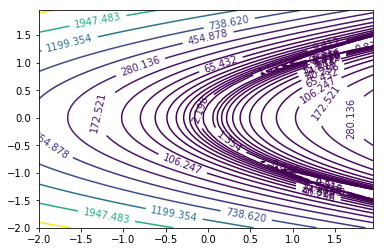

In [420]:
# Original function
f=lambda x,y: (1-x**3)+100*(y**2-x)**2

# x and y
x = np.arange(-2, 2, 0.05)
y = np.arange(-2, 2, 0.05)
X,Y= np.meshgrid(x,y)

# Plot contours
plt.figure()
CS = plt.contour(X,Y,f(X,Y), np.logspace(-0.5, 3.5, 20, base=10))
plt.clabel(CS,inline=True, fontsize=10)
plt.show()

### 2.3 Gradient descent

In [421]:
# Gradient
def grad_f(x,y):
    df_dx=-3**2-200*(y**2-x)
    df_dy=400*y*(y**2-x)
    return np.array([df_dx, df_dy])


# Gradient descent
def grad_descent(iters, lr):
    np.random.seed(123)
    vector=np.random.uniform(-2,2,size=2)
    trajectory=[]
    
    for i in range(iters):
        g=grad_f(vector[0], vector[1])
        vector=vector-g*lr
        #print(vector[0], vector[1])
        trajectory.append(vector)
        
    return np.array(trajectory)

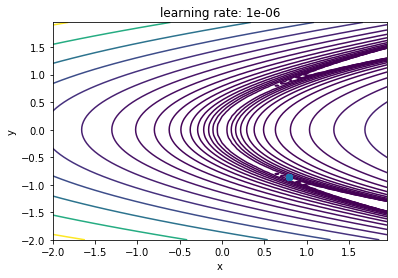

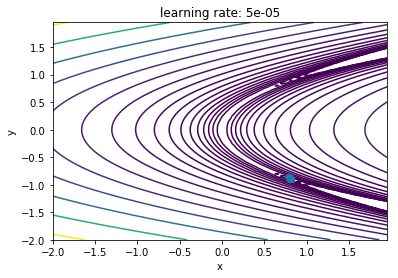

In [422]:
# Visualize results
def grad_plot(iters, lr):
    traj=grad_descent(iters=iters, lr=lr)
    fig, ax = plt.subplots()
    ax.contour(X, Y, f(X,Y), np.logspace(-0.5, 3.5, 20, base=10))
    
    x=traj[:,0]
    y=traj[:,1]
    plt.title('learning rate: '+str(lr))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,y, '-o')
    plt.show()

    
# Few learning rate 
grad_plot(100, 0.000001)
grad_plot(100, 0.00005)

### 2.4 Momentum algorithm

In [423]:
# Gadient descent momentum
def grad_momentum(iters, alpha, epsilon):
    np.random.seed(123)
    vector=np.random.uniform(-2,2,size=2)
    trajectory=[]
    v = np.zeros(vector.size)
    
    for i in range(iters):
        g=grad_f(vector[0], vector[1])
        v = alpha * v + epsilon * g
        vector = vector - v
        #print(vector[0], vector[1])
        trajectory.append(vector)
        
    return np.array(trajectory)

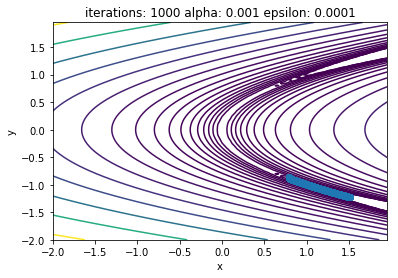

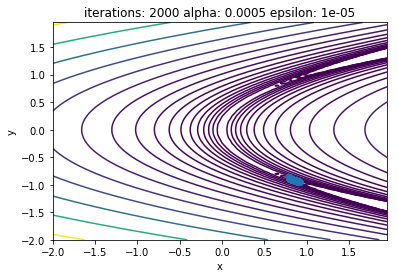

In [426]:
def momentum_plot(iters, alpha, epsilon):
    traj=grad_momentum(iters=iters, alpha=alpha, epsilon=epsilon)
    fig, ax = plt.subplots()
    ax.contour(X, Y, f(X,Y), np.logspace(-0.5, 3.5, 20, base=10))
    
    x=traj[:,0]
    y=traj[:,1]
    plt.title('iterations: '+str(iters)+' '+'alpha: '+str(alpha)+' '+'epsilon: '+str(epsilon))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,y, '-o')
    plt.show()
    
# Few examples 
momentum_plot(1000, 0.001, 0.0001)
momentum_plot(2000, 0.0005, 0.00001)

# 3. Backprop

### 3.1 Gradient of parameters

The function is:
$$\hat{y} = sigmoid(relu(\vec{x}\vec{w_1} + \vec{b_1})\vec{v} + \vec{c})$$

Break it up:
$$ \vec{a_1}=\vec{x}\vec{w_1} + \vec{b_1} $$
$$ \vec{h_1}=relu(\vec{a_1}) $$
$$ \vec{a_2}=\vec{h_1} \vec{v} + \vec{c} $$
$$ \hat{y}= sigmoid(\vec{a_2}) $$

Our loss function and derivative respective to $\hat{y}$
$$ L = -y_i*log(\hat{y_i}) - (1-y_i)*log(1-\hat{y_i}) $$
$$ \frac{\partial{L}}{\partial{\hat{y_i}}}=-(\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1- \hat{y_i}})$$

The gradients of weights and biases:
$$
\begin{aligned}
\frac{\partial{L}}{\partial{c}} & = \frac{\partial{L}}{\partial{\hat{y_i}}}sigmoid'(\vec{a_2})\\
\frac{\partial{L}}{\partial{v}} & = \frac{\partial{L}}{\partial{\hat{y_i}}}sigmoid'(\vec{a_2})\vec{h_1} \\
\frac{\partial{L}}{\partial{b_1}} & = \frac{\partial{L}}{\partial{\hat{y_i}}}sigmoid'(\vec{a_2})(\vec{v})(relu'(\vec{a_1})) \\
\frac{\partial{L}}{\partial{w_1}} & = \frac{\partial{L}}{\partial{\hat{y_i}}}sigmoid'(\vec{a_2})(\vec{v})(relu'(\vec{a_1}))(\vec{x}) \\
\end{aligned}
$$

### 3.2 Gradient function

In [438]:
# Helper functions
relu_derivative = lambda x: np.where(x>0, 1, 0)
sigmoid_derivative=lambda x: sigmoid(x)*(1 - sigmoid(x))

def loss(y,yhat):
    total=y*(np.log(yhat))+(1-y)*(np.log(1-yhat))
    return -total.sum()

def y_hat(x, params):
    # Get weights and biases
    w=params[0:6].reshape(2,3)
    b=params[6:9].reshape(1,3)
    v=params[9:12].reshape(3,1)
    c=params[12]
    
    h1=relu(np.dot(x, w)+b)
    y=sigmoid(np.dot(h1, v) + c)
    
    return y

In [427]:
# Gradient function
def grad_f2(x, y, params):
    # Get weights and biases
    w=params[0:6].reshape(2,3)
    b=params[6:9].reshape(1,3)
    v=params[9:12].reshape(3,1)
    c=params[12]
    
    h1 = relu(np.dot(x, w) + b) # first layer
    y_hat = sigmoid(np.dot(h1, v) + c) # second layer
    
    # layer loss
    layer2 = (-((y/y_hat)-(1-y)/(1-y_hat))).sum(axis=0)
    layer1 = (-((y/y_hat)-(1-y)/(1-y_hat))).dot(v.T) * (h1>0)
    
    d_v = (h1.T).dot(-((y/y_hat)-(1-y)/(1-y_hat)))
    d_w = (x.T).dot(layer1)
    d_c = layer2
    d_b = (layer1).sum(axis=0)
    
    # Store gradients to one array
    grads = np.array(list(d_w.reshape(6,)) + list(d_b.reshape(3,)) 
                     + list(d_v.reshape(3,)) + list(d_c.reshape(1,)))
    
    return grads

#p=np.random.randn(13)
#grad_f(x,y,p)

### 3.3 Generate XOR pattern dataset

In [468]:
# Generate 
def gen_xor_data(n):
    # Fix seed
    np.random.seed(123)

    # List of x
    a1=list(np.random.uniform(-2,2, size=n))
    a2=list(np.random.uniform(-2,2, size=n))
        
    # label
    c=[]
    for i, val in enumerate(a1):
        if val>0 and a2[i]>0:
            c.append(1)
        elif val<0 and a2[i]<0:
            c.append(1)
        else:
            c.append(0)
                
    
    return a1, a2, c

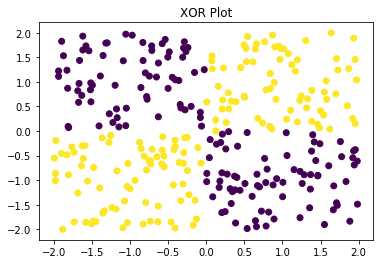

In [678]:
x1,x2,y1=gen_xor_data(300)
# Plot the data
plt.scatter(x1,x2, c=y1)
plt.title('XOR Plot')
plt.show()

In [663]:
def gen_x_y(a1,a2,b1):
    # Fix the seed
    #np.random.seed(123)
    
    c=np.column_stack((a1, a2, b1))
    C=c[np.random.choice(c.shape[0], 3, replace=False), :]
    x=np.column_stack((C[:,0], C[:,1]))
    y=np.array([C[:,2]]).reshape(3,1)
    
    return x,y

### 3.4 Fit network to gradient descent

In [411]:
def grad_descent2(x,y,iters,lr):
    # Fix the seed
    np.random.seed(123)
    # Get initiate parameters
    params=np.random.randn(13)
    
    traj = [params]
    losses = [loss(y, y_hat(x, params))]
    
    for i in range(iters):
        g = grad_f2(x, y, params)
        params=params-g*lr
        traj.append(params)
        losses.append(loss(y, y_hat(x, params)))
        
    return (np.array(traj), losses)

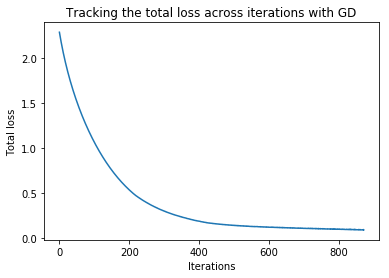

In [439]:
X1,Y1=gen_x_y(x1,x2,y1)

# Plot the total loss
trajectory, losses = grad_descent2(X1,Y1, iters = 1500, lr = 0.001)
plt.plot(losses)
plt.title("Tracking the total loss across iterations with GD")
plt.xlabel("Iterations")
plt.ylabel("Total loss")
plt.show()

### 3.5 Fit network to momentum

In [413]:
def grad_momentum2(x,y,iters, alpha, epsilon):
    # Fix the seed
    np.random.seed(123)
    # Get initiate parameters
    params=np.random.randn(13)
    
    traj = [params]
    losses = [loss(y, y_hat(x, params))]
    vec = np.zeros(params.size) 
    
    for i in range(iters):
        g = grad_f2(x, y, params)
        vec = alpha*vec + epsilon*g
        params = params - vec
        traj.append(params)
        losses.append(loss(y, y_hat(x, params)))
        
    return (np.array(traj), losses)

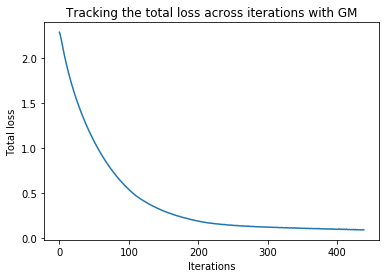

In [467]:
# Plot the total loss
trajectory, losses = grad_momentum2(X1,Y1,iters=1500, alpha=0.5, epsilon=0.001)
plt.plot(losses)
plt.title("Tracking the total loss across iterations with GM")
plt.xlabel("Iterations")
plt.ylabel("Total loss")
plt.show()

From the plots above, we can see that gradient descent with momentum turns to converge more efficiently, total loss for radient descent with momentum decreased more rapidly than gradient descent in the first 100 iterations. After 400 iterations, their performances become closer.<br><br>

It's just the result for this case, given different sets of alpha and epsilon, results may be different. 

### 3.6 Viz of decision boundary

In [677]:
# Last trained parameters by GD with momentum
p=trajectory[439]

In [670]:
# Predict y
def predict(x1,x2,y1,params):
    c1=[]
    c2=[]
    y_true=[]
    y_predict=[]
    
    for i in range(100):
        x,y=gen_x_y(x1,x2,y1)
        for i in x[:,0]: c1.append(i)
        for j in x[:,1]: c2.append(j)
        for m in range(3): y_true.append(y[m][0])
        yhat=y_hat(x,params)
        for n in range(3): y_predict.append(yhat[n][0])
    
    return c1, c2, y_true, y_predict


x1,x2,y1=gen_xor_data(300)
X1, X2, y_true1, y_predict1=predict(x1,x2,y1,p)

In [675]:
# Set the boundary color
c1=300*['Yellow']

for i in range(300):
    if y_predict1[i] > 0.5:
        c1[i]='Purple'

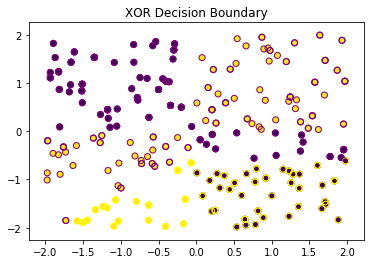

In [676]:
# Plot the results
plt.scatter(X1, X2, c=y_true1)
plt.scatter(X1, X2, c='', marker='o', edgecolors=c1)
plt.title('XOR Decision Boundary')
plt.show()

The edge color indicates the predicted label, yellow means 0, purple means 1.